# **Imports**

In [243]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D,MaxPooling2D,BatchNormalization, Flatten, Dense, Dropout
from keras.layers import LeakyReLU

### Read Data

In [244]:
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
# training = pd.read_csv('/content/drive/MyDrive/training.csv')
training = pd.read_csv('../Data/training.csv')

Data Exploration

In [246]:
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [247]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [248]:
training.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

## Pipeline Functions

### Pre-Processing

In [249]:
def get_non_null_features(training_df):
  """
  This funcion returns the columns of the dataset which have less than 1 percent null values.
  """
  non_null_columns = list()

  temp_df = training_df.drop('Image', axis=1)
  null_count_df = temp_df.isnull().sum()
  null_count_df = null_count_df.reset_index()
  null_count_df.columns = ['column', 'null_count']

  for i in range(len(null_count_df)):
    if null_count_df.iloc[i]['null_count']/len(training_df)<0.01:
      non_null_columns.append(null_count_df.iloc[i]['column'])

  non_null_columns.append('Image')

  return non_null_columns

In [250]:
def pre_process_data(training_df):
  """
  This function uses non-null columns identified by `get_non_null_features` function to create a dataframe containing 
  only those columns. It also drops any rows containing null values in the resulting dataframe.
  """
  non_null_columns = get_non_null_features(training_df)
  df_feat_removed = training_df[non_null_columns]
  df_feat_removed = df_feat_removed.dropna()
  df_feat_removed.reset_index(drop=True, inplace=True)

  return df_feat_removed

In [251]:
def seperate_input_output_data(df_feat_removed):
  """
  This function creates seperate dataframes for input images and output keypoints.
  """
  input_X_data = df_feat_removed[['Image']]
  output_Y_data = df_feat_removed.drop('Image', axis=1)
  return input_X_data, output_Y_data

In [252]:
def process_image_pixels(image):
  """
  Processes image to return pixels in a 2d integer array.
  """
  pixels_int = np.array(image.split()).astype('int')
  image_2d = pixels_int.reshape(96,96)
  return image_2d

def get_image_data(input_X_data):
  """
  Uses the `process_image_pixels` function to retuen an array of 2d array images. 
  """
  image_data = []
  count = 0
  for im in input_X_data.Image:
    image_data.append(process_image_pixels(im))
  return image_data

### Model Architecture Definition

In [253]:
def get_model_architecture():
  """
  Returns Sequential Keras Model containing Conv, Batch Normalization, Maxpooling and Dense Layers.
  """
  model = Sequential()

  model.add(Convolution2D(32,(3,3),padding='same',use_bias=False, input_shape=(96,96,1)))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(Convolution2D(32,(3,3),padding='same',use_bias = False))
  model.add(LeakyReLU(alpha=0.1))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Convolution2D(64,(3,3),padding='same',use_bias = False))
  model.add(LeakyReLU(alpha=0.1))
  model.add(BatchNormalization())
  model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(8))
  
  return model


### Model Training 

In [254]:
def train_model(X_train, y_train, model):
  """
  Function to train the model.
  """
  model.compile(optimizer="adam",
      loss="mean_squared_error",
      metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, batch_size=32)
  return history.history

### Model Evaluation

In [255]:
def evaluate_model(X_test, y_test, model):
  """
  Function to evaluate the model on hold-out data.
  """
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return test_loss, test_accuracy

In [256]:
def get_model_predictions(X_test, model):
  """
  Return predictions made by the model on test data.
  """
  y_test = model.predict(X_test)
  return y_test

In [257]:
def calculate_rmse(y_test, y_pred):
  """
  Return the root mean squared error between the actual and predicted test values.
  """
  return np.sqrt(np.mean(np.square(y_test-y_pred)))

## Plots

In [258]:
def plot_rnd_image_keypoints(x_data, y_data):
  """
  Function to plot a random image with keypoints.
  """
  image_ind = random.randint(0, x_data.shape[0]-1)
  random_image = x_data[image_ind, :]

  plt.figure(figsize=(5,5))
  plt.imshow(random_image*255, cmap='gray')
  for i in range(0, y_data.shape[1], 2):
      plt.plot(y_data[image_ind, i], y_data[image_ind, i+1], 'x', color='r')
  
  plt.show() 

In [259]:
def plot_train_val_accuracy(history):
  """
  Plot to compare the train and validation accuracy.
  """
  plt.figure(1)
  plt.plot(history['accuracy'], label='training_accuracy')
  plt.plot(history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.title('Training vs Validation Accuracy')

In [260]:
def plot_train_val_loss(history):
  """
  Plot to compare the train and validation loss.
  """
  plt.figure(2)
  plt.plot(history['loss'], label='training_loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.legend()
  plt.title('Training vs Validation Loss')

In [274]:
def plot_actual_vs_predicted_keypoints(x_data, y_data, y_data_pred):
  """
  Plots the actual vs predicted keypoints on a set of test images.
  """
  rand_img = []
  for i in range(0,8):
    n = random.randint(1,x_data.shape[0])
    rand_img.append(n)
  X_rnd_images = x_data[rand_img,:]
  y_rnd = y_data[rand_img,:]
  y_pred_rnd = y_data_pred[rand_img,:]

  fig = plt.figure(figsize=(20,10))
  for i in range(0, 8):
    random_image = X_rnd_images[i, :]
    y = y_rnd[i,:]
    y_pred = y_pred_rnd[i,:]
    ax = fig.add_subplot(2,4,i+1)
    ax.imshow(random_image*255, cmap='gray')
    for j in range(0, y_test.shape[1], 2):
      ax.plot(y[j], y[j+1], 'x', color='r', markersize=10)
      ax.plot(y_pred[j], y_pred[j+1], 'x', color='b', markersize=10)

## Pipeline Run

In [262]:
# Data Pre-Processing
non_null_columns = get_non_null_features(training)
pre_processed_df = pre_process_data(training)
input_X_data, output_Y_data = seperate_input_output_data(pre_processed_df)
image_data = get_image_data(input_X_data)


In [263]:
# Train-Test Split
output_Y_data = np.array(output_Y_data)
X_train, X_test, y_train, y_test = train_test_split(image_data, output_Y_data, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Print shape of train and test data
print("Shape of input train data:{}".format(X_train.shape))
print("Shape of output train data:{}".format(y_train.shape))
print("Shape of input test data:{}".format(X_test.shape))
print("Shape of output test data:{}".format(y_test.shape))

# Scale train images 
X_train = X_train/255
# y_train = y_train/255

# Scale test images
X_test = X_test/255
# y_test = y_test/255

Shape of input train data:(5600, 96, 96)
Shape of output train data:(5600, 8)
Shape of input test data:(1400, 96, 96)
Shape of output test data:(1400, 8)


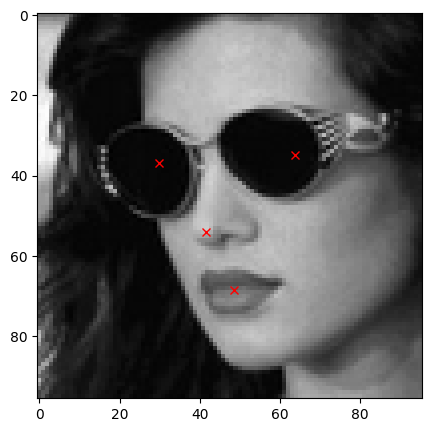

In [264]:
# Plot Random Training Image
plot_rnd_image_keypoints(X_train, y_train)

In [265]:
# model definition and training
model = get_model_architecture()
train_history = train_model(X_train, y_train, model)

Epoch 1/100
167/167 [==============================] - 14s 40ms/step - loss: 59.4534 - accuracy: 0.9812 - val_loss: 84.8440 - val_accuracy: 0.9964
Epoch 2/100
167/167 [==============================] - 6s 37ms/step - loss: 17.4731 - accuracy: 0.9895 - val_loss: 15.1731 - val_accuracy: 0.9964
Epoch 3/100
167/167 [==============================] - 6s 38ms/step - loss: 14.7119 - accuracy: 0.9898 - val_loss: 10.9904 - val_accuracy: 0.9964
Epoch 4/100
167/167 [==============================] - 6s 38ms/step - loss: 13.1808 - accuracy: 0.9906 - val_loss: 10.7019 - val_accuracy: 0.9964
Epoch 5/100
167/167 [==============================] - 6s 39ms/step - loss: 11.8160 - accuracy: 0.9885 - val_loss: 5.5242 - val_accuracy: 0.9964
Epoch 6/100
167/167 [==============================] - 7s 40ms/step - loss: 11.8893 - accuracy: 0.9919 - val_loss: 24.2485 - val_accuracy: 0.9964
Epoch 7/100
167/167 [==============================] - 7s 39ms/step - loss: 10.0372 - accuracy: 0.9914 - val_loss: 5.6132 - 

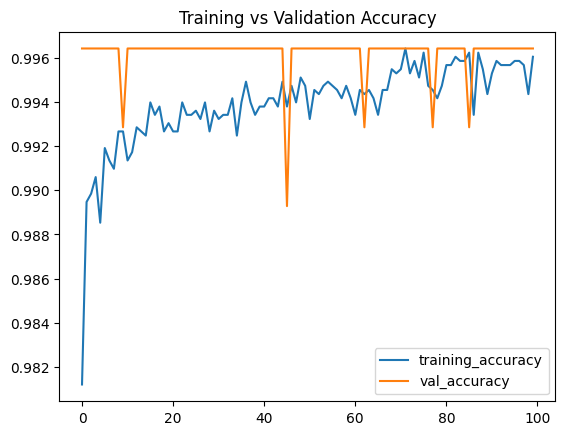

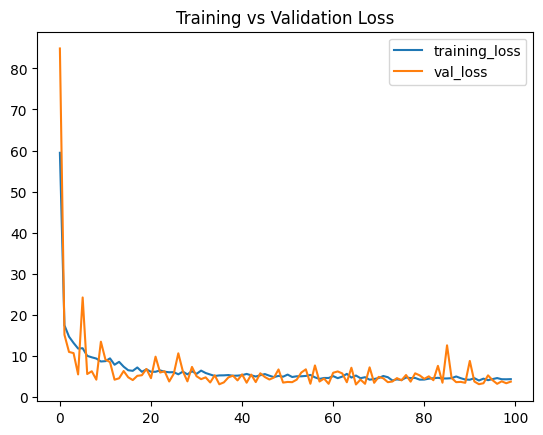

In [266]:
# plot train and validation metrics
plot_train_val_accuracy(train_history)
plot_train_val_loss(train_history)

In [267]:
# evaluate model performance on test data
test_loss, test_accuracy = evaluate_model(X_test, y_test, model)
print("test loss: {}".format(test_loss))
print("test accuracy: {}".format(test_accuracy))

44/44 [==============================] - 1s 14ms/step - loss: 4.5097 - accuracy: 0.9929
test loss: 4.509722709655762
test accuracy: 0.9928571581840515


In [268]:
y_test_hat = get_model_predictions(X_test, model)

44/44 [==============================] - 1s 10ms/step


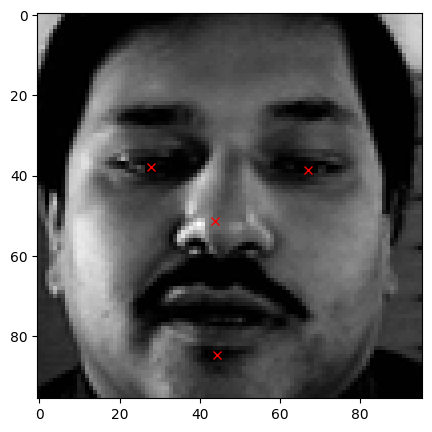

In [269]:
# plot random test image

plot_rnd_image_keypoints(X_test, y_test_hat)

In [270]:
print("RMSE between actual and predicted keypoints: {} ".format(calculate_rmse(y_test, y_test_hat)))

RMSE between actual and predicted keypoints: 2.123610641306009 


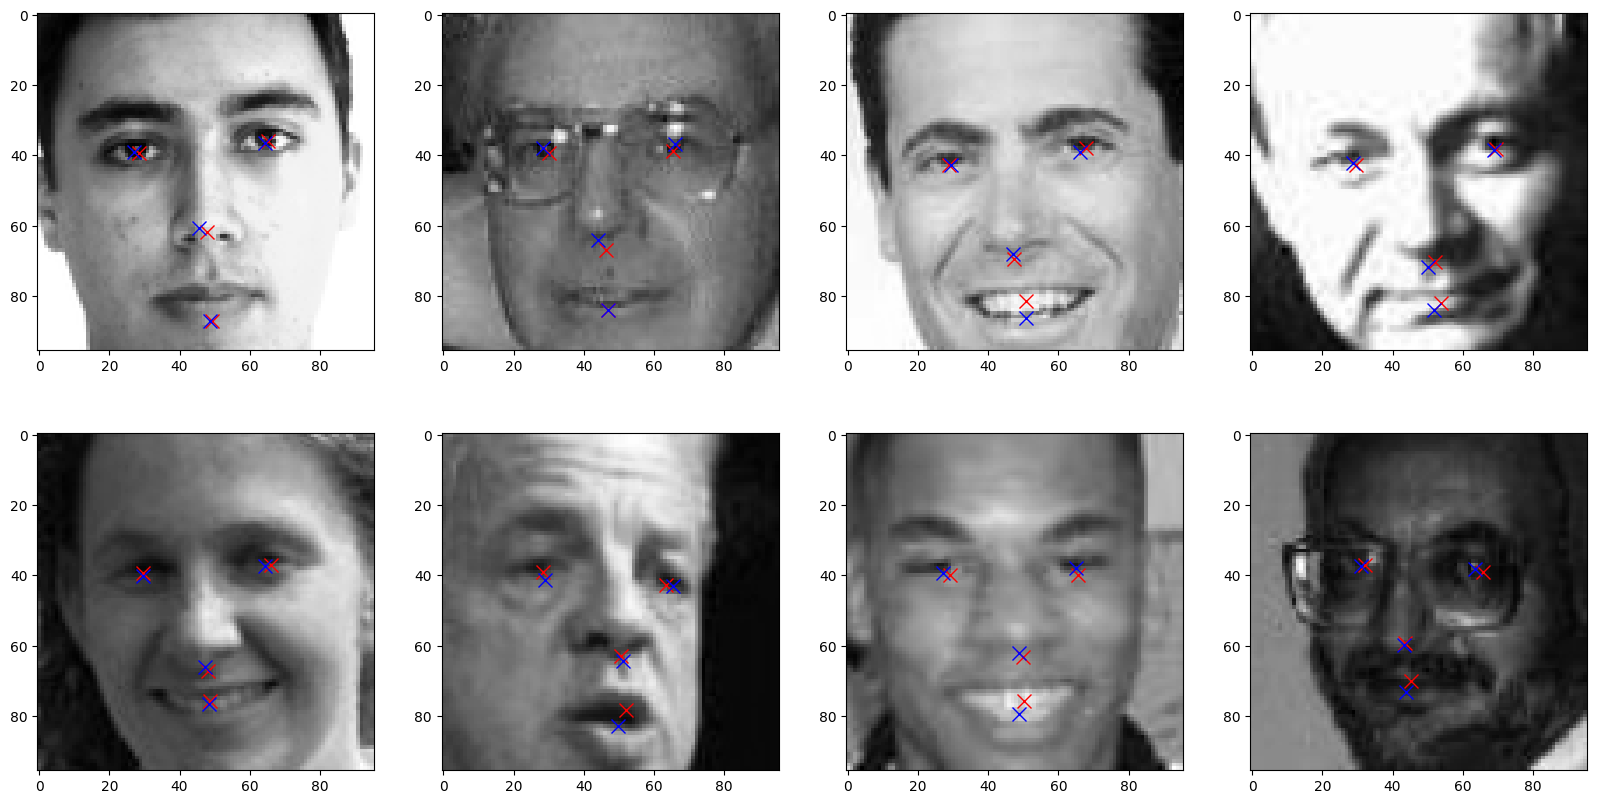

In [275]:
plot_actual_vs_predicted_keypoints(X_test, y_test, y_test_hat)